In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("signal.csv")

In [4]:
df.head(5)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.shape

(1599, 12)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Parameter 2,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Parameter 3,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Parameter 4,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Parameter 5,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Parameter 6,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Parameter 7,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Parameter 8,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
Parameter 9,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Parameter 10,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [7]:
df.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

/Users/shadab_019/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


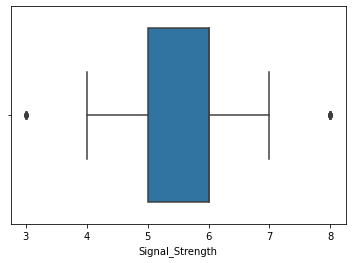

In [8]:
sns.boxplot(df['Signal_Strength'])
plt.show()

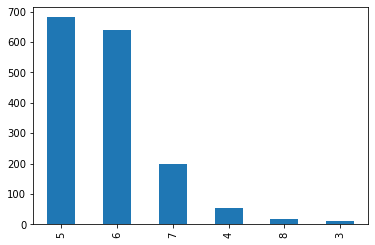

In [9]:
df['Signal_Strength'].value_counts().plot(kind="bar")
plt.show()

/Users/shadab_019/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


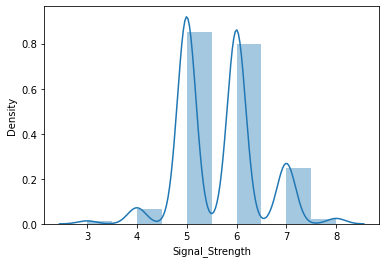

In [10]:
sns.distplot(df['Signal_Strength'], bins= 10)
plt.show()

As we can see the distribution of the target column is almost gausian with few outliers the loss function which we will use while training and tuning Regressor model will be Mean Absolute Error.

In [11]:
# No need of preprocessing the Data as there is no null data present.

In [12]:
corr = df.corr()
corr

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
Parameter 1,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
Parameter 2,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
Parameter 3,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
Parameter 4,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
Parameter 5,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
Parameter 6,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
Parameter 7,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
Parameter 8,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
Parameter 9,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
Parameter 10,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

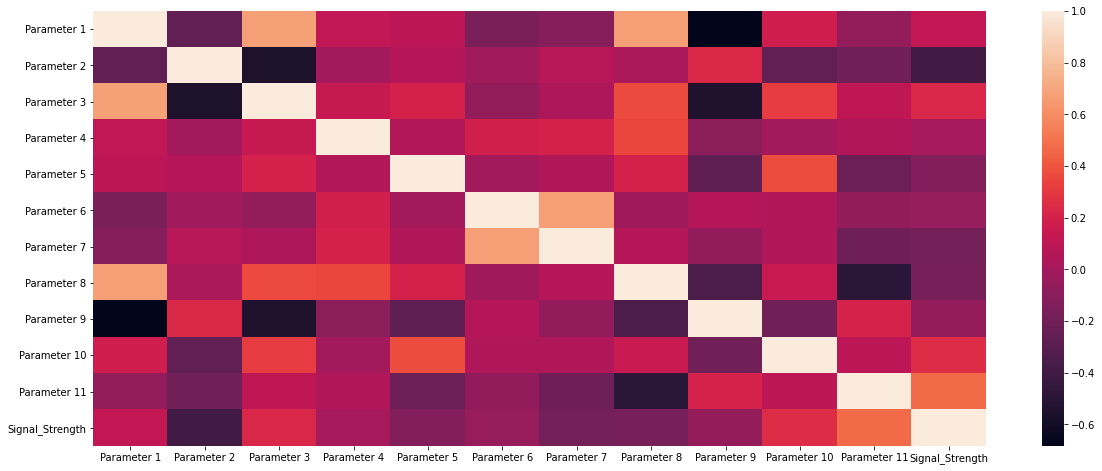

In [13]:
plt.subplots(figsize = (20 ,8))
sns.heatmap(corr)

# Correlation Analysis
The col Par 1 is highly correlated to the col par 3 and col par 8.
And also col par 6 and col par7 are highly correlated to each other

# Feature Importance
Using ExtraTreeClassifier find the importance of the features and check which is the most important features.


In [14]:
x = df.drop("Signal_Strength", axis =1) # Independent Variable
y = df["Signal_Strength"]               # Target Variable

from sklearn.ensemble import ExtraTreesClassifier
modelETC = ExtraTreesClassifier()
modelETC.fit(x,y)
print(modelETC.feature_importances_)
z = pd.Series(modelETC.feature_importances_, index =x.columns)
z

[0.07727115 0.09727383 0.08165877 0.07827025 0.07635715 0.07401697
 0.09953872 0.08687548 0.07500818 0.10122262 0.15250688]


Parameter 1     0.077271
Parameter 2     0.097274
Parameter 3     0.081659
Parameter 4     0.078270
Parameter 5     0.076357
Parameter 6     0.074017
Parameter 7     0.099539
Parameter 8     0.086875
Parameter 9     0.075008
Parameter 10    0.101223
Parameter 11    0.152507
dtype: float64

<AxesSubplot:>

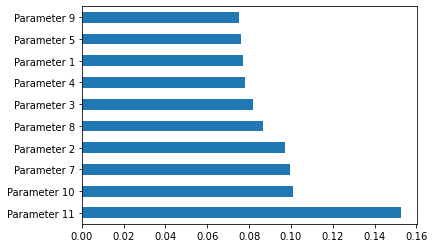

In [15]:
z.nlargest(10).plot(kind = 'barh')

df.drop("Parameter 9", axis = 1, inplace =True)
df.drop("Parameter 1", axis =1 , inplace = True)

In [16]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x, y, train_size= 0.7, random_state = 12)

In [17]:
# To verify the size of test and train data
x_train.shape, x_test.shape

((1119, 11), (480, 11))

# Data Scaling
Feature scaling done so that model has a smooth approach to the minima and the steps for the, gradient descent is updated at the same rate so the weights are calculated and learned proportionally.


In [18]:
from sklearn.preprocessing import StandardScaler as stdslr
XTRS = stdslr().fit_transform(x_train)
XTS = stdslr().fit_transform(x_test)

In [19]:
XTRS.shape, XTS.shape

((1119, 11), (480, 11))

In [20]:
from tensorflow.keras import Sequential # For Forward Propagation
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras import optimizers

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
x_train.shape[1]

11

# Nueral Network Regressor Model.

In [23]:
import keras.backend as K
def r2_score(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [24]:
from tensorflow.keras.layers import BatchNormalization, Dropout, Activation

def Reg():  
    global model, reg, NN_regressor
    def nn_model4():
        model = Sequential()
    
        model.add(Dense(128, kernel_initializer='normal', input_dim = x_train.shape[1]))
        model.add(BatchNormalization())
        #model.add(Activation('relu'))
        model.add(Dropout(0.2))
        model.add(LeakyReLU(alpha=0.1))

    
        model.add(Dense(64, kernel_initializer='normal'))
        model.add(BatchNormalization())
        #model.add(Activation('relu'))
        model.add(Dropout(0.2))
        model.add(LeakyReLU(alpha=0.1))


    
        model.add(Dense(32, kernel_initializer='normal'))
        model.add(BatchNormalization())
        #model.add(Activation('relu'))
        model.add(Dropout(0.2))
        model.add(LeakyReLU(alpha=0.1))


    
        #model.add(Dense(16, kernel_initializer='normal'))
        #model.add(BatchNormalization())
        #model.add(Activation('relu'))
        #model.add(Dropout(0.2))
        #model.add(LeakyReLU(alpha=0.1))



        model.add(Dense(1, kernel_initializer='normal'))
        #model.add(Activation('relu'))
        model.add(LeakyReLU(alpha=0.1))

    
        adam = optimizers.Adam(lr = 0.001)
        model.compile(loss= "mean_absolute_error", optimizer = "adam", metrics= [r2_score])
        
        
        return model
    nn_model4().summary()
    EPOCHS = 400
    es = EarlyStopping(monitor='val_r2_score', mode='max', 
                           patience=30)
    reg = nn_model4()
    NN_regressor= reg.fit(XTRS, y_train,
    validation_data= (XTS, y_test), epochs = EPOCHS, 
                          batch_size = 8, callbacks = [es])
    

In [25]:
Reg()

/Users/shadab_019/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1536      
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

Epoch 42/400
140/140 [==============================] - 0s 3ms/step - loss: 0.7090 - r2_score: -0.5241 - val_loss: 0.4926 - val_r2_score: 0.0508
Epoch 43/400
140/140 [==============================] - 0s 3ms/step - loss: 0.6920 - r2_score: -0.6218 - val_loss: 0.4984 - val_r2_score: 0.1215
Epoch 44/400
140/140 [==============================] - 0s 3ms/step - loss: 0.6923 - r2_score: -0.5787 - val_loss: 0.4914 - val_r2_score: 0.0612
Epoch 45/400
140/140 [==============================] - 0s 3ms/step - loss: 0.6883 - r2_score: -0.6206 - val_loss: 0.4790 - val_r2_score: 0.0986
Epoch 46/400
140/140 [==============================] - 0s 3ms/step - loss: 0.6932 - r2_score: -0.6655 - val_loss: 0.4796 - val_r2_score: 0.1525
Epoch 47/400
140/140 [==============================] - 0s 3ms/step - loss: 0.6769 - r2_score: -0.5310 - val_loss: 0.4860 - val_r2_score: 0.0748
Epoch 48/400
140/140 [==============================] - 0s 3ms/step - loss: 0.6499 - r2_score: -0.4905 - val_loss: 0.4949 - val_r2

140/140 [==============================] - 0s 3ms/step - loss: 0.6166 - r2_score: -0.3323 - val_loss: 0.4699 - val_r2_score: 0.1315
Epoch 99/400
140/140 [==============================] - 0s 3ms/step - loss: 0.5961 - r2_score: -441693.3750 - val_loss: 0.4672 - val_r2_score: 0.1403
Epoch 100/400
140/140 [==============================] - 0s 3ms/step - loss: 0.5959 - r2_score: -0.2772 - val_loss: 0.4784 - val_r2_score: 0.1322
Epoch 101/400
140/140 [==============================] - 0s 3ms/step - loss: 0.5900 - r2_score: -253092.0625 - val_loss: 0.4778 - val_r2_score: 0.1187
Epoch 102/400
140/140 [==============================] - 0s 3ms/step - loss: 0.5881 - r2_score: -475976.2812 - val_loss: 0.4624 - val_r2_score: 0.1510
Epoch 103/400
140/140 [==============================] - 0s 3ms/step - loss: 0.5861 - r2_score: -0.2012 - val_loss: 0.4676 - val_r2_score: 0.1539
Epoch 104/400
140/140 [==============================] - 0s 3ms/step - loss: 0.5722 - r2_score: -0.1527 - val_loss: 0.4644 -

Epoch 154/400
140/140 [==============================] - 0s 3ms/step - loss: 0.5370 - r2_score: -0.0353 - val_loss: 0.4520 - val_r2_score: 0.2002
Epoch 155/400
140/140 [==============================] - 0s 3ms/step - loss: 0.5286 - r2_score: 0.0341 - val_loss: 0.4548 - val_r2_score: 0.2329
Epoch 156/400
140/140 [==============================] - 0s 3ms/step - loss: 0.5305 - r2_score: 0.0573 - val_loss: 0.4426 - val_r2_score: 0.2439
Epoch 157/400
140/140 [==============================] - 0s 3ms/step - loss: 0.5662 - r2_score: -0.2570 - val_loss: 0.4529 - val_r2_score: 0.1934
Epoch 158/400
140/140 [==============================] - 0s 3ms/step - loss: 0.5403 - r2_score: -0.0237 - val_loss: 0.4442 - val_r2_score: 0.2462
Epoch 159/400
140/140 [==============================] - 0s 3ms/step - loss: 0.5388 - r2_score: 0.0254 - val_loss: 0.4531 - val_r2_score: 0.2286
Epoch 160/400
140/140 [==============================] - 0s 3ms/step - loss: 0.5376 - r2_score: -0.0467 - val_loss: 0.4424 - va

In [26]:
results1 = reg.evaluate(XTRS, y_train)

35/35 [==============================] - 0s 3ms/step - loss: 0.4354 - r2_score: 0.4674


In [27]:
results = reg.evaluate(XTS, y_test)

15/15 [==============================] - 0s 2ms/step - loss: 0.4527 - r2_score: 0.3551


In [28]:
print("Test Accuracy", results[1]*100)

Test Accuracy 35.510289669036865


# Nueral Network Classifier Model.

convert the The Target data in to categorical data via one hot coding

In [29]:
from keras.utils.np_utils import to_categorical
YTRC = to_categorical(y_train)
YTC = to_categorical(y_test)

Design the classifier NN Model.

In [30]:
def cls():
    global clas, NN_classifier, cla, EPOCHS
    def nn_model5():
        clas= Sequential()

        #Input Layer
        clas.add(Dense(128, kernel_initializer ='normal', input_dim = x_train.shape[1],
               activation="relu"))
        #Hidden Layer
        clas.add(Dense(64,kernel_initializer ='normal', activation = "relu" ))
        clas.add(LeakyReLU(alpha=0.1))

        clas.add(Dense(32 ,kernel_initializer ='normal'))
        clas.add(LeakyReLU(alpha=0.1))

        clas.add(Dense(16 ,kernel_initializer ='normal'))
        clas.add(LeakyReLU(alpha=0.1))

        #Output Layer
        clas.add(Dense(9,kernel_initializer ='normal', activation = "softmax" ))
        clas.add(LeakyReLU(alpha=0.1))
    
        # Compile the Network
        clas.compile(loss= "categorical_crossentropy", optimizer = "adam", metrics= ['accuracy'])
        return clas
    nn_model5().summary()
    EPOCHS = 400
    cla= nn_model5()
    #es = EarlyStopping(monitor='val_accuracy', mode='max', patience=2)
    NN_classifier= cla.fit(XTRS, YTRC,validation_data= (XTS, YTC), 
                        epochs = EPOCHS, batch_size = 200)
    

In [31]:
cls()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               1536      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 16)                528       
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 16)               

6/6 [==============================] - 0s 9ms/step - loss: 0.9430 - accuracy: 0.5862 - val_loss: 0.9150 - val_accuracy: 0.6333
Epoch 49/400
6/6 [==============================] - 0s 12ms/step - loss: 0.9392 - accuracy: 0.6014 - val_loss: 0.9111 - val_accuracy: 0.6229
Epoch 50/400
6/6 [==============================] - 0s 12ms/step - loss: 0.9315 - accuracy: 0.6068 - val_loss: 0.9111 - val_accuracy: 0.6187
Epoch 51/400
6/6 [==============================] - 0s 8ms/step - loss: 0.9234 - accuracy: 0.6148 - val_loss: 0.9110 - val_accuracy: 0.5979
Epoch 52/400
6/6 [==============================] - 0s 9ms/step - loss: 0.9204 - accuracy: 0.6077 - val_loss: 0.9138 - val_accuracy: 0.6083
Epoch 53/400
6/6 [==============================] - 0s 8ms/step - loss: 0.9153 - accuracy: 0.6193 - val_loss: 0.9125 - val_accuracy: 0.6021
Epoch 54/400
6/6 [==============================] - 0s 9ms/step - loss: 0.9103 - accuracy: 0.6139 - val_loss: 0.9138 - val_accuracy: 0.6062
Epoch 55/400
6/6 [=============

6/6 [==============================] - 0s 7ms/step - loss: 0.8112 - accuracy: 0.6497 - val_loss: 0.9291 - val_accuracy: 0.6271
Epoch 107/400
6/6 [==============================] - 0s 10ms/step - loss: 0.8049 - accuracy: 0.6515 - val_loss: 0.9318 - val_accuracy: 0.6229
Epoch 108/400
6/6 [==============================] - 0s 9ms/step - loss: 0.8087 - accuracy: 0.6443 - val_loss: 0.9310 - val_accuracy: 0.6146
Epoch 109/400
6/6 [==============================] - 0s 9ms/step - loss: 0.8017 - accuracy: 0.6524 - val_loss: 0.9374 - val_accuracy: 0.6167
Epoch 110/400
6/6 [==============================] - 0s 8ms/step - loss: 0.8006 - accuracy: 0.6542 - val_loss: 0.9253 - val_accuracy: 0.6229
Epoch 111/400
6/6 [==============================] - 0s 10ms/step - loss: 0.7976 - accuracy: 0.6461 - val_loss: 0.9289 - val_accuracy: 0.6187
Epoch 112/400
6/6 [==============================] - 0s 9ms/step - loss: 0.7941 - accuracy: 0.6559 - val_loss: 0.9449 - val_accuracy: 0.6187
Epoch 113/400
6/6 [======

6/6 [==============================] - 0s 13ms/step - loss: 0.6613 - accuracy: 0.7516 - val_loss: 0.9711 - val_accuracy: 0.6542
Epoch 165/400
6/6 [==============================] - 0s 11ms/step - loss: 0.6650 - accuracy: 0.7399 - val_loss: 1.0059 - val_accuracy: 0.6479
Epoch 166/400
6/6 [==============================] - 0s 10ms/step - loss: 0.6607 - accuracy: 0.7364 - val_loss: 0.9979 - val_accuracy: 0.6125
Epoch 167/400
6/6 [==============================] - 0s 10ms/step - loss: 0.6668 - accuracy: 0.7283 - val_loss: 0.9812 - val_accuracy: 0.6500
Epoch 168/400
6/6 [==============================] - 0s 12ms/step - loss: 0.6674 - accuracy: 0.7355 - val_loss: 1.0127 - val_accuracy: 0.6396
Epoch 169/400
6/6 [==============================] - 0s 8ms/step - loss: 0.6623 - accuracy: 0.7408 - val_loss: 1.0544 - val_accuracy: 0.6417
Epoch 170/400
6/6 [==============================] - 0s 9ms/step - loss: 0.6595 - accuracy: 0.7346 - val_loss: 0.9811 - val_accuracy: 0.6521
Epoch 171/400
6/6 [===

6/6 [==============================] - 0s 7ms/step - loss: 0.5118 - accuracy: 0.8186 - val_loss: 1.1350 - val_accuracy: 0.6521
Epoch 223/400
6/6 [==============================] - 0s 13ms/step - loss: 0.4970 - accuracy: 0.8097 - val_loss: 1.1712 - val_accuracy: 0.6521
Epoch 224/400
6/6 [==============================] - 0s 8ms/step - loss: 0.5217 - accuracy: 0.8016 - val_loss: 1.1443 - val_accuracy: 0.6438
Epoch 225/400
6/6 [==============================] - 0s 9ms/step - loss: 0.5036 - accuracy: 0.8186 - val_loss: 1.1597 - val_accuracy: 0.6604
Epoch 226/400
6/6 [==============================] - 0s 11ms/step - loss: 0.5261 - accuracy: 0.7945 - val_loss: 1.1472 - val_accuracy: 0.6646
Epoch 227/400
6/6 [==============================] - 0s 8ms/step - loss: 0.5029 - accuracy: 0.8097 - val_loss: 1.1700 - val_accuracy: 0.6542
Epoch 228/400
6/6 [==============================] - 0s 8ms/step - loss: 0.4840 - accuracy: 0.8275 - val_loss: 1.1572 - val_accuracy: 0.6458
Epoch 229/400
6/6 [======

6/6 [==============================] - 0s 9ms/step - loss: 0.3569 - accuracy: 0.8892 - val_loss: 1.4574 - val_accuracy: 0.6542
Epoch 281/400
6/6 [==============================] - 0s 10ms/step - loss: 0.3429 - accuracy: 0.8928 - val_loss: 1.5458 - val_accuracy: 0.6479
Epoch 282/400
6/6 [==============================] - 0s 9ms/step - loss: 0.3512 - accuracy: 0.8883 - val_loss: 1.4928 - val_accuracy: 0.6583
Epoch 283/400
6/6 [==============================] - 0s 9ms/step - loss: 0.3293 - accuracy: 0.9026 - val_loss: 1.5027 - val_accuracy: 0.6542
Epoch 284/400
6/6 [==============================] - 0s 8ms/step - loss: 0.3222 - accuracy: 0.9106 - val_loss: 1.5100 - val_accuracy: 0.6604
Epoch 285/400
6/6 [==============================] - 0s 9ms/step - loss: 0.3316 - accuracy: 0.8972 - val_loss: 1.5350 - val_accuracy: 0.6625
Epoch 286/400
6/6 [==============================] - 0s 9ms/step - loss: 0.3184 - accuracy: 0.8981 - val_loss: 1.5120 - val_accuracy: 0.6583
Epoch 287/400
6/6 [=======

6/6 [==============================] - 0s 9ms/step - loss: 0.2496 - accuracy: 0.9223 - val_loss: 1.7556 - val_accuracy: 0.6417
Epoch 339/400
6/6 [==============================] - 0s 8ms/step - loss: 0.2446 - accuracy: 0.9285 - val_loss: 1.7729 - val_accuracy: 0.6479
Epoch 340/400
6/6 [==============================] - 0s 15ms/step - loss: 0.2257 - accuracy: 0.9428 - val_loss: 1.7143 - val_accuracy: 0.6604
Epoch 341/400
6/6 [==============================] - 0s 10ms/step - loss: 0.2339 - accuracy: 0.9366 - val_loss: 1.8355 - val_accuracy: 0.6542
Epoch 342/400
6/6 [==============================] - 0s 9ms/step - loss: 0.2281 - accuracy: 0.9401 - val_loss: 1.7510 - val_accuracy: 0.6562
Epoch 343/400
6/6 [==============================] - 0s 9ms/step - loss: 0.2291 - accuracy: 0.9410 - val_loss: 1.7319 - val_accuracy: 0.6562
Epoch 344/400
6/6 [==============================] - 0s 15ms/step - loss: 0.2193 - accuracy: 0.9428 - val_loss: 1.8227 - val_accuracy: 0.6354
Epoch 345/400
6/6 [=====

6/6 [==============================] - 0s 8ms/step - loss: 0.1685 - accuracy: 0.9598 - val_loss: 2.0326 - val_accuracy: 0.6542
Epoch 397/400
6/6 [==============================] - 0s 8ms/step - loss: 0.1790 - accuracy: 0.9562 - val_loss: 2.0866 - val_accuracy: 0.6479
Epoch 398/400
6/6 [==============================] - 0s 8ms/step - loss: 0.2062 - accuracy: 0.9419 - val_loss: 2.0963 - val_accuracy: 0.6500
Epoch 399/400
6/6 [==============================] - 0s 7ms/step - loss: 0.1913 - accuracy: 0.9428 - val_loss: 2.0466 - val_accuracy: 0.6542
Epoch 400/400
6/6 [==============================] - 0s 8ms/step - loss: 0.1873 - accuracy: 0.9517 - val_loss: 2.1367 - val_accuracy: 0.6417


In [32]:
results = cla.evaluate(XTS, YTC)

15/15 [==============================] - 0s 2ms/step - loss: 2.1367 - accuracy: 0.6417


In [33]:
print("Test Accuracy", results[1]*100)

Test Accuracy 64.16666507720947


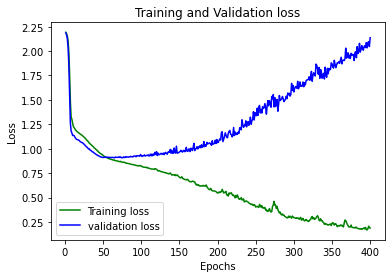

In [34]:
loss_train = NN_classifier.history['loss']
loss_val = NN_classifier.history['val_loss']
epochs = range(1,EPOCHS+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

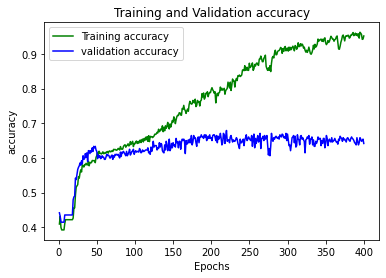

In [35]:
Acc_train = NN_classifier.history['accuracy']
Acc_val = NN_classifier.history['val_accuracy']
epochs = range(1,EPOCHS+1)
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Pickle
Save/Pickle the model further usage by saving it in json format And after pickling load and test the accuracy of the model to test and verify the process

In [36]:
#Saving Regressor Model

In [37]:
from keras.models import model_from_json
import numpy
import os

# Pickle model to JSON
NN_model_json = reg.to_json()
with open("NN_model.json", "w") as json_file:
    json_file.write(NN_model_json)
# Pickle weights to HDF5
reg.save_weights("NN_model.h5")
print("Saved model to disk")


# load json and create model
json_file = open('NN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("NN_model.h5")
print("Loaded model from disk")

# Evaluate
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(XTS,YTC, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Saved model to disk
Loaded model from disk
accuracy: 11.11%


In [38]:
#Saving Classifier Model

In [41]:
from keras.models import model_from_json
import numpy
import os

# Pickle model to JSON
NN_model_json = cla.to_json()
with open("NN_model.json", "w") as json_file:
    json_file.write(NN_model_json)
# Pickle weights to HDF5
cla.save_weights("NN_model.h5")
print("Saved model to disk")


# load json and create model
json_file = open('NN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("NN_model.h5")
print("Loaded model from disk")

# Evaluate
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(XTS,YTC, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Saved model to disk
Loaded model from disk
accuracy: 64.17%


In [ ]:
# Library

import tkinter as tk
from tkinter import ttk
import pandas as pd
import re
import h5py
import numpy as np

# App window
win = tk.Tk()
win.title('NN_GUI')  # Window Title

# Step 1: Import data frame name ---------------------------------

Name=ttk.Label(win,text="    Step 1: File Name")
Name.grid(row=0,column=0,sticky=tk.W)

Name_var=tk.StringVar()
Name_entrybox=ttk.Entry(win,width=16,textvariable=Name_var)
Name_entrybox.grid(row=0,column=1)

def Import_Data():
    global DB
    DF_Name=Name_var.get()
    DB_extension=re.findall("\..*", DF_Name) 
    if DB_extension==['.xlsx']:
        DB=pd.read_excel(DF_Name)
        confirm="Done"
    elif DB_extension==['.csv']:
        DB=pd.read_csv(DF_Name)
        confirm="Done"
    elif DB_extension==['.h5']:
        DB=h5py.File(DF_Name,'a')
    
        confirm="Done"
    else:
        confirm = "Not Done"
    
    # Blank empty window to print confirmation
    Confirm_entrybox=ttk.Entry(win,width=16)
    Confirm_entrybox.grid(row=0,column=3)
    Confirm_entrybox.insert(1,str(confirm))   

Import_Data_Button=ttk.Button(win,text="Import Data",command=Import_Data)
Import_Data_Button.grid(row=0,column=2)


# Step 2: Target data frame name ---------------------------------

Target = ttk.Label(win, text= "Step:2 Target Column")
Target.grid(row =1, column =0, sticky =tk.W)

Target_var = tk.StringVar()
Target_entrybox = ttk.Entry(win, width = 16, 
                            textvariable= Target_var)
Target_entrybox.grid(row =1, column = 1)

def Target_Data():
    global DB
    
    Target_Name = Target_var.get()
    
    column_name = DB.columns
    column_name
    found = 0
    for i in range(len(column_name)):
        if column_name[i] == Target_Name:
            confirm = "found"
        else:
            confirm = "Not Found"
            
    Confirm_entrybox = ttk.Entry(win, width =16)
    Confirm_entrybox.grid(row =1, column = 3)
    Confirm_entrybox.insert(1, str(confirm))

Target_button= ttk.Button(win, text = "Import Target",
                          command = Target_Data)
Target_button.grid(row=1 , column=2)

#_______________Step:3 Pickle Regressor Model_________________________________

N_Reg =ttk.Label(win, text= "Pickle: Regressor Model")
N_Reg.grid(row=2, column=0)

def NN_Reg():           
    Reg()
    
    Confirm_entrybox=ttk.Entry(win,width=16)
    Confirm_entrybox.grid(row=2,column=2)
    Confirm_entrybox.insert(1,str("Model Trained"))
    
Reg_Button = ttk.Button(win, text='Train', command= NN_Reg)
Reg_Button.grid(row=2, column=1)


def save():   
    # Pickle model to JSON
    Regressor_model_json = reg.to_json()
    with open("Regressor_model.json", "w") as json_file:
        json_file.write(Regressor_model_json)
    # Pickle weights to HDF5
    reg.save_weights("Regressor_model.h5")
    
    Confirm_entrybox=ttk.Entry(win,width=16)
    Confirm_entrybox.grid(row=3,column=1)
    Confirm_entrybox.insert(1,str("Saved model to disk"))

Save_Button=ttk.Button(win,text="Save",command=save)
Save_Button.grid(row=3,column=0)

def load():
    from keras.models import model_from_json
    # load json and create model
    json_file = open('Regressor_model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)   
    # load weights into new model
    loaded_model.load_weights("Regressor_model.h5")
    
    Confirm_entrybox=ttk.Entry(win,width=16)
    Confirm_entrybox.grid(row=3,column=3)
    Confirm_entrybox.insert(1,str("Loaded model to disk"))
    
Load_Button=ttk.Button(win,text="Load",command=load)
Load_Button.grid(row=3,column=2)

def run():
    from keras.models import model_from_json
    # load json and create model
    json_file = open('Regressor_model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)   
    # load weights into new model
    loaded_model.load_weights("Regressor_model.h5")
    #Evaluate the Model
    loaded_model.compile(loss='mean_absolute_error', optimizer='adam', 
                         metrics=[r2_score])
    score = loaded_model.evaluate(XTS,y_test, verbose=0)
    #print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
    
    Confirm = score[1]*100
    Confirm_entrybox=ttk.Entry(win,width=20)
    Confirm_entrybox.grid(row=5,column=1)
    Confirm_entrybox.insert(1,str(Confirm))

Pickle_Button4=ttk.Button(win,text="Run",command=run)
Pickle_Button4.grid(row=5,column=0)    

#_____________________Step:4 Pickle Classifier Model____________________


N_Reg =ttk.Label(win, text= "Pickle: Classifier Model")
N_Reg.grid(row=6, column=0)

def NN_Clas():           
    cls()
    
    Confirm_entrybox=ttk.Entry(win,width=16)
    Confirm_entrybox.grid(row=7,column=2)
    Confirm_entrybox.insert(1,str("Model Trained"))
    
Reg_Button = ttk.Button(win, text='Train', command= NN_Clas)
Reg_Button.grid(row=7, column=1)


def save():   
    # Pickle model to JSON
    Classifier_model_json = cla.to_json()
    with open("Classifier_model.json", "w") as json_file:
        json_file.write(Classifier_model_json)
    # Pickle weights to HDF5
    cla.save_weights("Classifier_model.h5")
    
    Confirm_entrybox=ttk.Entry(win,width=16)
    Confirm_entrybox.grid(row=8,column=1)
    Confirm_entrybox.insert(1,str("Saved model to disk"))

Save_Button=ttk.Button(win,text="Save",command=save)
Save_Button.grid(row=8,column=0)

def load():
    from keras.models import model_from_json
    # load json and create model
    json_file = open('Classifier_model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)   
    # load weights into new model
    loaded_model.load_weights("Classifier_model.h5")
    
    Confirm_entrybox=ttk.Entry(win,width=16)
    Confirm_entrybox.grid(row=8,column=3)
    Confirm_entrybox.insert(1,str("Loaded model to disk"))
    
Load_Button=ttk.Button(win,text="Load",command=load)
Load_Button.grid(row=8,column=2)

def run():
    from keras.models import model_from_json
    # load json and create model
    json_file = open('Classifier_model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)   
    # load weights into new model
    loaded_model.load_weights("Classifier_model.h5")
    #Evaluate the Model
    loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', 
                         metrics=["accuracy"])
    score = loaded_model.evaluate(XTS,YTC, verbose=0)
    #print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
    
    Confirm = score[1]*100
    Confirm_entrybox=ttk.Entry(win,width=20)
    Confirm_entrybox.grid(row=9,column=1)
    Confirm_entrybox.insert(1,str(Confirm))

Pickle_Button4=ttk.Button(win,text="Run",command=run)
Pickle_Button4.grid(row=9,column=0)    

           
    


win.mainloop()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 128)               1536      
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_7 (Batch (None, 64)                256       
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)               

Epoch 42/400
140/140 [==============================] - 0s 3ms/step - loss: 0.6951 - r2_score: -0.7747 - val_loss: 0.5331 - val_r2_score: -0.1712
Epoch 43/400
140/140 [==============================] - 0s 3ms/step - loss: 0.7226 - r2_score: -0.7266 - val_loss: 0.4875 - val_r2_score: 0.0681
Epoch 44/400
140/140 [==============================] - 0s 3ms/step - loss: 0.6910 - r2_score: -0.6383 - val_loss: 0.5113 - val_r2_score: 0.0541
Epoch 45/400
140/140 [==============================] - 0s 3ms/step - loss: 0.6938 - r2_score: -0.6450 - val_loss: 0.4824 - val_r2_score: 0.0676
Epoch 46/400
140/140 [==============================] - 0s 3ms/step - loss: 0.6858 - r2_score: -0.6396 - val_loss: 0.5198 - val_r2_score: -0.1079
Epoch 47/400
140/140 [==============================] - 0s 3ms/step - loss: 0.6831 - r2_score: -0.4783 - val_loss: 0.5107 - val_r2_score: 0.0341
Epoch 48/400
140/140 [==============================] - 0s 3ms/step - loss: 0.6658 - r2_score: -0.4219 - val_loss: 0.5022 - val_

140/140 [==============================] - 1s 5ms/step - loss: 0.5903 - r2_score: -0.2541 - val_loss: 0.4763 - val_r2_score: 0.1421
Epoch 99/400
140/140 [==============================] - 1s 5ms/step - loss: 0.5930 - r2_score: -440464.8750 - val_loss: 0.4789 - val_r2_score: 0.1197
Epoch 100/400
140/140 [==============================] - 1s 4ms/step - loss: 0.5932 - r2_score: -0.1504 - val_loss: 0.4778 - val_r2_score: 0.1445
Epoch 101/400
140/140 [==============================] - 1s 5ms/step - loss: 0.5781 - r2_score: -0.1319 - val_loss: 0.4789 - val_r2_score: 0.1237
Epoch 102/400
140/140 [==============================] - 1s 5ms/step - loss: 0.5776 - r2_score: -406725.8438 - val_loss: 0.4803 - val_r2_score: 0.1617
Epoch 103/400
140/140 [==============================] - 1s 4ms/step - loss: 0.5963 - r2_score: -0.2316 - val_loss: 0.4735 - val_r2_score: 0.1124
Epoch 104/400
140/140 [==============================] - 0s 3ms/step - loss: 0.5883 - r2_score: -0.1873 - val_loss: 0.4784 - val_

6/6 [==============================] - 0s 10ms/step - loss: 1.1613 - accuracy: 0.4218 - val_loss: 1.0880 - val_accuracy: 0.4354
Epoch 22/400
6/6 [==============================] - 0s 9ms/step - loss: 1.1583 - accuracy: 0.4218 - val_loss: 1.0855 - val_accuracy: 0.4354
Epoch 23/400
6/6 [==============================] - 0s 9ms/step - loss: 1.1550 - accuracy: 0.4218 - val_loss: 1.0832 - val_accuracy: 0.4354
Epoch 24/400
6/6 [==============================] - 0s 9ms/step - loss: 1.1523 - accuracy: 0.4218 - val_loss: 1.0810 - val_accuracy: 0.4354
Epoch 25/400
6/6 [==============================] - 0s 8ms/step - loss: 1.1488 - accuracy: 0.4218 - val_loss: 1.0789 - val_accuracy: 0.4354
Epoch 26/400
6/6 [==============================] - 0s 8ms/step - loss: 1.1465 - accuracy: 0.4218 - val_loss: 1.0779 - val_accuracy: 0.4354
Epoch 27/400
6/6 [==============================] - 0s 8ms/step - loss: 1.1437 - accuracy: 0.4218 - val_loss: 1.0767 - val_accuracy: 0.4375
Epoch 28/400
6/6 [==============

6/6 [==============================] - 0s 9ms/step - loss: 0.8842 - accuracy: 0.6220 - val_loss: 0.9020 - val_accuracy: 0.6271
Epoch 80/400
6/6 [==============================] - 0s 8ms/step - loss: 0.8822 - accuracy: 0.6247 - val_loss: 0.9004 - val_accuracy: 0.6208
Epoch 81/400
6/6 [==============================] - 0s 9ms/step - loss: 0.8801 - accuracy: 0.6265 - val_loss: 0.9014 - val_accuracy: 0.6292
Epoch 82/400
6/6 [==============================] - 0s 11ms/step - loss: 0.8828 - accuracy: 0.6130 - val_loss: 0.9057 - val_accuracy: 0.6250
Epoch 83/400
6/6 [==============================] - 0s 10ms/step - loss: 0.8852 - accuracy: 0.6211 - val_loss: 0.8958 - val_accuracy: 0.6333
Epoch 84/400
6/6 [==============================] - 0s 10ms/step - loss: 0.8771 - accuracy: 0.6166 - val_loss: 0.9165 - val_accuracy: 0.6104
Epoch 85/400
6/6 [==============================] - 0s 10ms/step - loss: 0.8783 - accuracy: 0.6157 - val_loss: 0.8974 - val_accuracy: 0.6271
Epoch 86/400
6/6 [===========

6/6 [==============================] - 0s 9ms/step - loss: 0.7519 - accuracy: 0.6801 - val_loss: 0.9801 - val_accuracy: 0.6167
Epoch 138/400
6/6 [==============================] - 0s 10ms/step - loss: 0.7552 - accuracy: 0.6774 - val_loss: 0.9495 - val_accuracy: 0.6229
Epoch 139/400
6/6 [==============================] - 0s 10ms/step - loss: 0.7496 - accuracy: 0.6845 - val_loss: 0.9876 - val_accuracy: 0.6292
Epoch 140/400
6/6 [==============================] - 0s 9ms/step - loss: 0.7480 - accuracy: 0.6872 - val_loss: 0.9667 - val_accuracy: 0.6229
Epoch 141/400
6/6 [==============================] - 0s 11ms/step - loss: 0.7466 - accuracy: 0.6854 - val_loss: 0.9691 - val_accuracy: 0.6187
Epoch 142/400
6/6 [==============================] - 0s 9ms/step - loss: 0.7493 - accuracy: 0.6819 - val_loss: 0.9906 - val_accuracy: 0.6250
Epoch 143/400
6/6 [==============================] - 0s 9ms/step - loss: 0.7403 - accuracy: 0.6890 - val_loss: 0.9694 - val_accuracy: 0.6229
Epoch 144/400
6/6 [=====

6/6 [==============================] - 0s 10ms/step - loss: 0.6115 - accuracy: 0.7659 - val_loss: 1.1352 - val_accuracy: 0.6313
Epoch 196/400
6/6 [==============================] - 0s 8ms/step - loss: 0.6026 - accuracy: 0.7721 - val_loss: 1.0860 - val_accuracy: 0.6479
Epoch 197/400
6/6 [==============================] - 0s 8ms/step - loss: 0.5963 - accuracy: 0.7730 - val_loss: 1.0528 - val_accuracy: 0.6583
Epoch 198/400
6/6 [==============================] - 0s 12ms/step - loss: 0.6037 - accuracy: 0.7703 - val_loss: 1.0975 - val_accuracy: 0.6417
Epoch 199/400
6/6 [==============================] - 0s 11ms/step - loss: 0.5954 - accuracy: 0.7703 - val_loss: 1.1144 - val_accuracy: 0.6396
Epoch 200/400
6/6 [==============================] - 0s 11ms/step - loss: 0.5839 - accuracy: 0.7739 - val_loss: 1.1089 - val_accuracy: 0.6438
Epoch 201/400
6/6 [==============================] - 0s 10ms/step - loss: 0.5828 - accuracy: 0.7739 - val_loss: 1.0707 - val_accuracy: 0.6604
Epoch 202/400
6/6 [===

6/6 [==============================] - 0s 9ms/step - loss: 0.4713 - accuracy: 0.8302 - val_loss: 1.2753 - val_accuracy: 0.6479
Epoch 254/400
6/6 [==============================] - 0s 9ms/step - loss: 0.4639 - accuracy: 0.8329 - val_loss: 1.2058 - val_accuracy: 0.6729
Epoch 255/400
6/6 [==============================] - 0s 10ms/step - loss: 0.4647 - accuracy: 0.8302 - val_loss: 1.1918 - val_accuracy: 0.6625
Epoch 256/400
6/6 [==============================] - 0s 8ms/step - loss: 0.4552 - accuracy: 0.8454 - val_loss: 1.2261 - val_accuracy: 0.6646
Epoch 257/400
6/6 [==============================] - 0s 9ms/step - loss: 0.4540 - accuracy: 0.8409 - val_loss: 1.2833 - val_accuracy: 0.6687
Epoch 258/400
6/6 [==============================] - 0s 10ms/step - loss: 0.4578 - accuracy: 0.8382 - val_loss: 1.2539 - val_accuracy: 0.6458
Epoch 259/400
6/6 [==============================] - 0s 10ms/step - loss: 0.4488 - accuracy: 0.8418 - val_loss: 1.3613 - val_accuracy: 0.6313
Epoch 260/400
6/6 [=====

6/6 [==============================] - 0s 9ms/step - loss: 0.3781 - accuracy: 0.8785 - val_loss: 1.5119 - val_accuracy: 0.6521
Epoch 312/400
6/6 [==============================] - 0s 9ms/step - loss: 0.3742 - accuracy: 0.8767 - val_loss: 1.5660 - val_accuracy: 0.6479
Epoch 313/400
6/6 [==============================] - 0s 14ms/step - loss: 0.3438 - accuracy: 0.8928 - val_loss: 1.5340 - val_accuracy: 0.6542
Epoch 314/400
6/6 [==============================] - 0s 7ms/step - loss: 0.3531 - accuracy: 0.8856 - val_loss: 1.4267 - val_accuracy: 0.6458
Epoch 315/400
6/6 [==============================] - 0s 11ms/step - loss: 0.3547 - accuracy: 0.8874 - val_loss: 1.5629 - val_accuracy: 0.6458
Epoch 316/400
6/6 [==============================] - 0s 11ms/step - loss: 0.3495 - accuracy: 0.8874 - val_loss: 1.5400 - val_accuracy: 0.6479
Epoch 317/400
6/6 [==============================] - 0s 9ms/step - loss: 0.3469 - accuracy: 0.8892 - val_loss: 1.4224 - val_accuracy: 0.6625
Epoch 318/400
6/6 [=====

6/6 [==============================] - 0s 10ms/step - loss: 0.2306 - accuracy: 0.9366 - val_loss: 1.7719 - val_accuracy: 0.6292
Epoch 370/400
6/6 [==============================] - 0s 10ms/step - loss: 0.2291 - accuracy: 0.9357 - val_loss: 1.8198 - val_accuracy: 0.6271
Epoch 371/400
6/6 [==============================] - 0s 11ms/step - loss: 0.2293 - accuracy: 0.9419 - val_loss: 1.9182 - val_accuracy: 0.6167
Epoch 372/400
6/6 [==============================] - 0s 10ms/step - loss: 0.2419 - accuracy: 0.9249 - val_loss: 1.8290 - val_accuracy: 0.6167
Epoch 373/400
6/6 [==============================] - 0s 10ms/step - loss: 0.2323 - accuracy: 0.9348 - val_loss: 1.8218 - val_accuracy: 0.6333
Epoch 374/400
6/6 [==============================] - 0s 10ms/step - loss: 0.2266 - accuracy: 0.9339 - val_loss: 1.8430 - val_accuracy: 0.6375
Epoch 375/400
6/6 [==============================] - 0s 10ms/step - loss: 0.2244 - accuracy: 0.9383 - val_loss: 1.8409 - val_accuracy: 0.6271
Epoch 376/400
6/6 [=